# Bagging

In [36]:
%matplotlib inline

import itertools
import numpy as np

import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.gridspec as gridspec

from sklearn import datasets

from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier

from sklearn.ensemble import BaggingClassifier
from sklearn.model_selection import cross_val_score, train_test_split

from mlxtend.plotting import plot_learning_curves
from mlxtend.plotting import plot_decision_regions

np.random.seed(0)

In [37]:
iris = datasets.load_iris()
X, y = iris.data[:, 0:2], iris.target

clf1 = DecisionTreeClassifier(criterion="entropy", max_depth=1)
clf2 = KNeighborsClassifier(n_neighbors=1)

bagging1 = BaggingClassifier(
    base_estimator=clf1, n_estimators=10, max_samples=0.8, max_features=0.8
)
bagging2 = BaggingClassifier(
    base_estimator=clf2, n_estimators=10, max_samples=0.8, max_features=0.8
)

Accuracy: 0.63 (+/- 0.02) [Decision Tree]
Accuracy: 0.70 (+/- 0.02) [K-NN]
Accuracy: 0.66 (+/- 0.02) [Bagging Tree]
Accuracy: 0.61 (+/- 0.02) [Bagging K-NN]


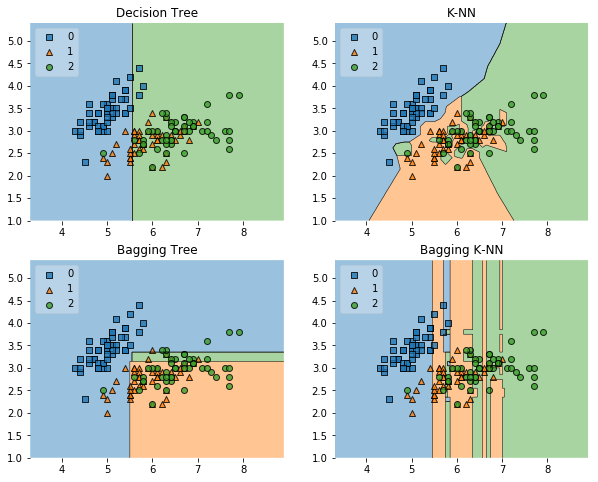

In [38]:
label = ["Decision Tree", "K-NN", "Bagging Tree", "Bagging K-NN"]
clf_list = [clf1, clf2, bagging1, bagging2]

fig = plt.figure(figsize=(10, 8))
gs = gridspec.GridSpec(2, 2)
grid = itertools.product([0, 1], repeat=2)

for clf, label, grd in zip(clf_list, label, grid):
    scores = cross_val_score(clf, X, y, cv=3, scoring="accuracy")
    print(
        "Accuracy: {0:.2f}".format(scores.mean()),
        "(+/- {0:.2f})".format(scores.std()),
        "[%s]" % label,
    )

    clf.fit(X, y)
    ax = plt.subplot(gs[grd[0], grd[1]])
    fig = plot_decision_regions(X=X, y=y, clf=clf, legend=2)
    plt.title(label)

plt.show()

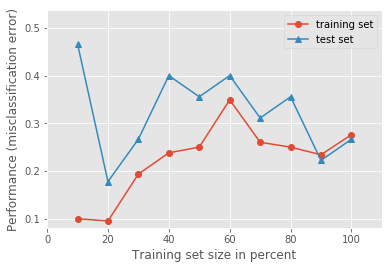

In [39]:
# plot learning curves
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.3, random_state=42
)

plt.figure()
plot_learning_curves(
    X_train, y_train, X_test, y_test, bagging1, print_model=False, style="ggplot"
)
plt.show()

In [44]:
# Ensemble Size
num_est = list(map(int, np.linspace(1, 100, 20)))
bg_clf_cv_mean = []
bg_clf_cv_std = []
for n_est in num_est:
    bg_clf = BaggingClassifier(
        base_estimator=clf1, n_estimators=n_est, max_samples=0.8, max_features=0.8
    )
    scores = cross_val_score(bg_clf, X, y, cv=3, scoring="accuracy")
    bg_clf_cv_mean.append(scores.mean())
    bg_clf_cv_std.append(scores.std())

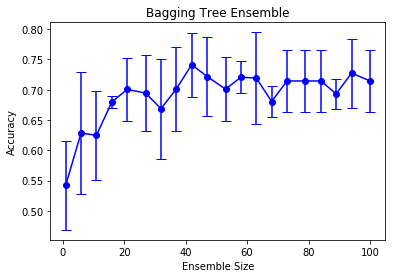

In [45]:
plt.figure()
(_, caps, _) = plt.errorbar(
    num_est, bg_clf_cv_mean, yerr=bg_clf_cv_std, c="blue", fmt="-o", capsize=5
)
for cap in caps:
    cap.set_markeredgewidth(1)
plt.ylabel("Accuracy")
plt.xlabel("Ensemble Size")
plt.title("Bagging Tree Ensemble")
plt.show()